In [39]:
import librosa
import numpy as np
from pydub import AudioSegment
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy import signal
import pandas as pd


In [54]:
import pydub
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    x = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    x.export(f, format="mp3", bitrate="320k")

In [58]:
pathAudio = 'C:/Users/hennm/Desktop/InputSong//'
files = []
loaded_files = librosa.util.find_files(pathAudio, ext=['mp3'])
for file in loaded_files:
    #if 'Holizna' in file:
    files.append(file)
    #files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))
    samples = []
    sr_s = 0
for file_name in files:
    #song, sr = librosa.load(file_name)
    sr, x = read(file_name)

    #start.append(samples[:200])
    #end.append(samples[-200:])
    #resampled_part = signal.resample(song, int(len(song)/15))
    #samples.append(resampled_part)





In [59]:
loaded_files

['C:\\Users\\hennm\\Desktop\\InputSong\\HoliznaCC0 - Poor, But Happy.mp3',
 'C:\\Users\\hennm\\Desktop\\InputSong\\Ketsa - Satellites.mp3',
 'C:\\Users\\hennm\\Desktop\\InputSong\\Tea K Pea - nauticals.mp3']

In [26]:
for i in range(0, len(start)):
    plt.plot(start[i])
    #plt.savefig(pathAudio+'start/plot_'+str(i)+'.png')
    plt.close()

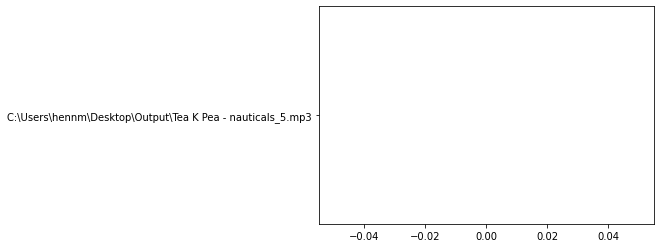

In [32]:
plot = files[4]
plt.plot(plot)

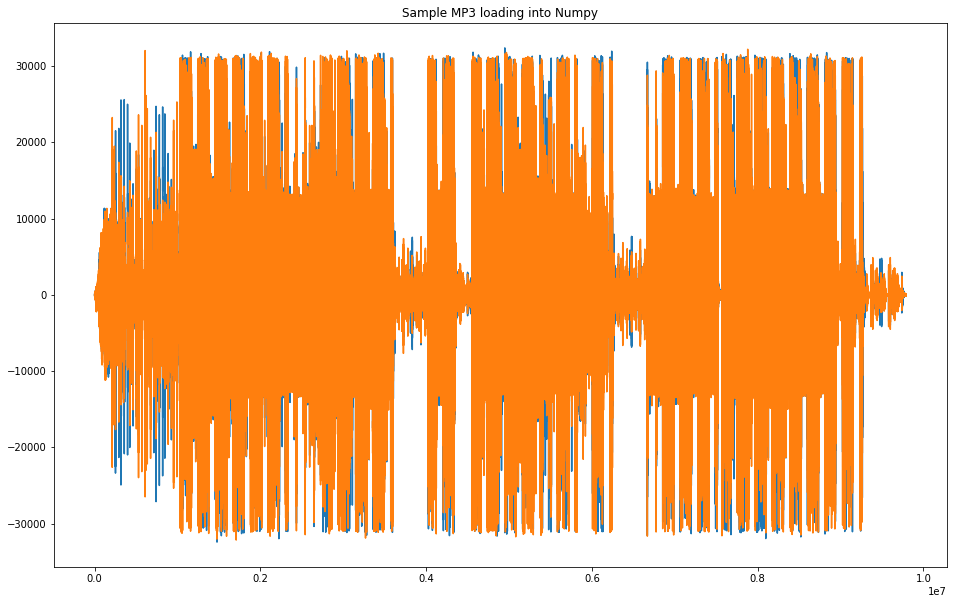

In [60]:
plt.figure(figsize=(16,10))
plt.plot(x)
plt.title("Sample MP3 loading into Numpy")
plt.show()